In [3]:
%matplotlib inline
#import utilities
import os
import shutil
import numpy as np
import random
from tqdm import tqdm  
from time import time
from PIL import Image
import h5py
import pandas as pd
from helper import *
import matplotlib.pyplot as plt

from keras.models import *
from keras.layers import *
from keras.applications import *
from keras.preprocessing.image import *
from keras.callbacks import *
from keras.optimizers import *
from keras.utils import *
from keras import backend as K

from sklearn.utils import shuffle


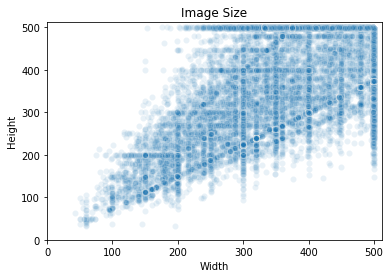

In [13]:
work_dir  = os.getcwd()
train_dir = work_dir + "/train/"
test_dir  = work_dir + "/test/"


train_files = os.listdir(train_dir) 

img_size = np.zeros((len(train_files),2))
for i in range(len(train_files)):
    img = load_img(train_dir+train_files[i])
    img_size[i,0] = img.size[0]
    img_size[i,1] = img.size[1]

plt.scatter(img_size[:,0], img_size[:,1],alpha=0.1,edgecolors= 'white')
plt.title('Image Size')#显示图表标题
plt.xlabel('Width') #x轴名称
plt.ylabel('Height')#y轴名称 
plt.xlim(0,512)   
plt.ylim(0,512)  
plt.show()    

In [51]:
img_statics = np.zeros((len(train_files),3,2))

for i in range(len(train_files)):
    img = load_img(train_dir+train_files[i])
    img_array = img_to_array(img)
    img_statics[i,0,0] = img_array[:,:,0].mean()
    img_statics[i,0,1] = img_array[:,:,0].std()
    img_statics[i,1,0] = img_array[:,:,1].mean()
    img_statics[i,1,1] = img_array[:,:,1].std()
    img_statics[i,2,0] = img_array[:,:,2].mean()
    img_statics[i,2,1] = img_array[:,:,2].std()

/home/pengjun/.conda/envs/keras/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


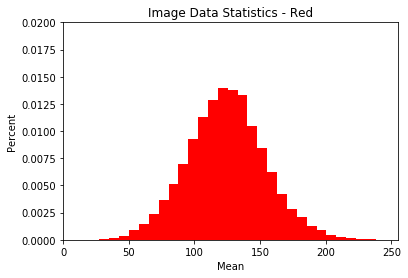

In [102]:
plt.hist(img_statics[:,0,0],32,normed=True,color='red')
plt.title('Image Data Statistics - Red')
plt.xlabel('Mean')
plt.ylabel('Percent')
plt.xlim(0,255)   
plt.ylim(0,0.02)   
plt.show()    

/home/pengjun/.conda/envs/keras/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


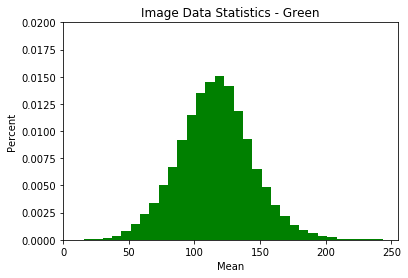

In [101]:
plt.hist(img_statics[:,1,0],32,normed=True,color='green')
plt.title('Image Data Statistics - Green')
plt.xlabel('Mean')
plt.ylabel('Percent')
plt.xlim(0,255)   
plt.ylim(0,0.02)   
plt.show()    

/home/pengjun/.conda/envs/keras/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


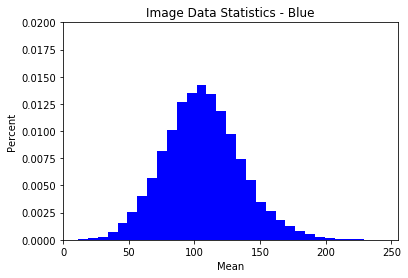

In [97]:
plt.hist(img_statics[:,2,0],32,normed=True,color='blue')
plt.title('Image Data Statistics - Blue')
plt.xlabel('Mean')
plt.ylabel('Percent')
plt.xlim(0,255)   
plt.ylim(0,0.02)   
plt.show()    

/home/pengjun/.conda/envs/keras/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


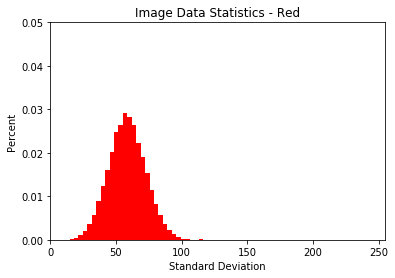

In [100]:
plt.hist(img_statics[:,0,1],32,normed=True,color='Red')
plt.title('Image Data Statistics - Red')
plt.xlabel('Standard Deviation')
plt.ylabel('Percent')
plt.xlim(0,255)   
plt.ylim(0,0.05)   
plt.show()    

/home/pengjun/.conda/envs/keras/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


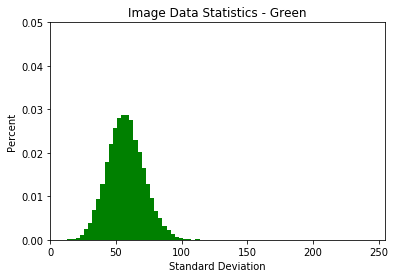

In [94]:
plt.hist(img_statics[:,1,1],32,normed=True,color='green')
plt.title('Image Data Statistics - Green')
plt.xlabel('Standard Deviation')
plt.ylabel('Percent')
plt.xlim(0,255)   
plt.ylim(0,0.05)   
plt.show()    

/home/pengjun/.conda/envs/keras/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


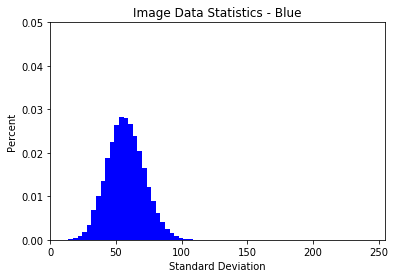

In [93]:
plt.hist(img_statics[:,2,1],32,normed=True,color='blue')
plt.title('Image Data Statistics - Blue')
plt.xlabel('Standard Deviation')
plt.ylabel('Percent')
plt.xlim(0,255)   
plt.ylim(0,0.05)   
plt.show()    